In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
from functions import *
path = '/Users/yujiaxie/Desktop/Capstone/'
path

'/Users/yujiaxie/Desktop/Capstone/'

In [5]:
household_df = pd.read_csv(path+"household/household_data_1min_singleindex.csv",parse_dates=['utc_timestamp'])
timeseries_df = pd.read_csv(path+"timeseries/time_series_15min_singleindex.csv",parse_dates=['utc_timestamp','cet_cest_timestamp'])
weather_df = pd.read_csv(path+"weather/weather_data.csv",parse_dates=['utc_timestamp'])

In [11]:
household, timeseries, weather = preproc(household_df, timeseries_df, weather_df)

@1.118s taken for {preproc}


In [17]:
householdL, cum_householdL = clean_data(household)

@72.182s taken for {clean_data}


In [18]:
householdL[0]

,day,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum
0,2016-01-02,328.500,4.920,3.540,0.0,336.960
1,2016-01-03,427.000,4.150,2.990,0.0,434.140
2,2016-01-04,642.000,4.840,3.900,0.0,650.740
3,2016-01-05,673.500,6.290,5.260,0.0,685.050
4,2016-01-06,669.625,2.360,1.490,0.0,673.475
...,...,...,...,...,...,...
418,2017-02-23,703.141,16.030,11.319,0.0,730.490
419,2017-02-24,650.046,10.371,7.951,0.0,668.368
420,2017-02-25,363.235,19.070,13.180,0.0,395.485
421,2017-02-26,466.922,12.739,8.659,0.0,488.320


In [119]:
t = timeseries.copy()
t.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_actual_entsoe_transparency',
       'DE_LU_load_forecast_entsoe_transparency',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
       'DE_LU_wind_offshore_g

In [139]:
t = t[(t.utc_timestamp > '2016-01-01') & (t.utc_timestamp < '2017-02-28')] # same time interval as household
tmp = [c for c in t.columns if 'LU' not in c and 'amprion' not in c and 'transnetbw' not in c and 'tennet' not in c and '50hertz' not in c]
t = t[tmp] # exclude DE-LU (bidding zone) and control areas
t['day'] = pd.to_datetime(t.utc_timestamp.apply(lambda x: x.date()))
daily_t = t.groupby('day').mean().reset_index() # use mean or max?
daily_t

,day,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
0,2016-01-01,41974.447895,44367.835474,38631.042105,781.559789,0.020232,32812.000000,4424.344632,0.134838,2162.00,833.532421,0.385536,30650.000000,3590.812211,0.117157
1,2016-01-02,47829.043437,43780.862813,38632.000000,391.806042,0.010146,32812.000000,17067.452292,0.520154,2162.00,2721.764583,1.258911,30650.000000,14345.687708,0.468051
2,2016-01-03,47109.530729,41824.320521,38632.500000,563.254063,0.014578,32812.000000,16928.938229,0.515935,2162.00,2618.961667,1.211354,30650.000000,14309.976562,0.466884
3,2016-01-04,57747.098958,49674.699792,38644.041667,419.986458,0.010868,32812.000000,11602.458750,0.353604,2162.00,2656.350833,1.228652,30650.000000,8946.107917,0.291877
4,2016-01-05,59588.026146,52906.619479,38645.083333,522.921563,0.013528,32812.208333,8602.816042,0.262180,2162.00,2587.908958,1.196996,30650.166667,6014.907083,0.196245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2017-02-23,64217.598229,64292.756979,40267.208333,2113.442083,0.052482,37761.958333,29391.877917,0.778341,2715.00,2960.155521,1.090298,35046.958333,26431.722396,0.754172
420,2017-02-24,62280.882500,63566.159479,40272.000000,2939.349896,0.072986,37784.375000,21754.422708,0.575752,2715.25,2436.746146,0.897470,35069.125000,19317.676563,0.550845
421,2017-02-25,53066.403333,55170.584271,40272.000000,4065.815521,0.100961,37793.000000,17240.360833,0.456183,2721.00,3173.990313,1.166480,35072.000000,14066.370521,0.401071
422,2017-02-26,48424.065625,51507.242917,40272.208333,2476.956875,0.061504,37794.458333,22714.318021,0.600998,2721.00,3886.456354,1.428316,35073.458333,18827.861667,0.536816


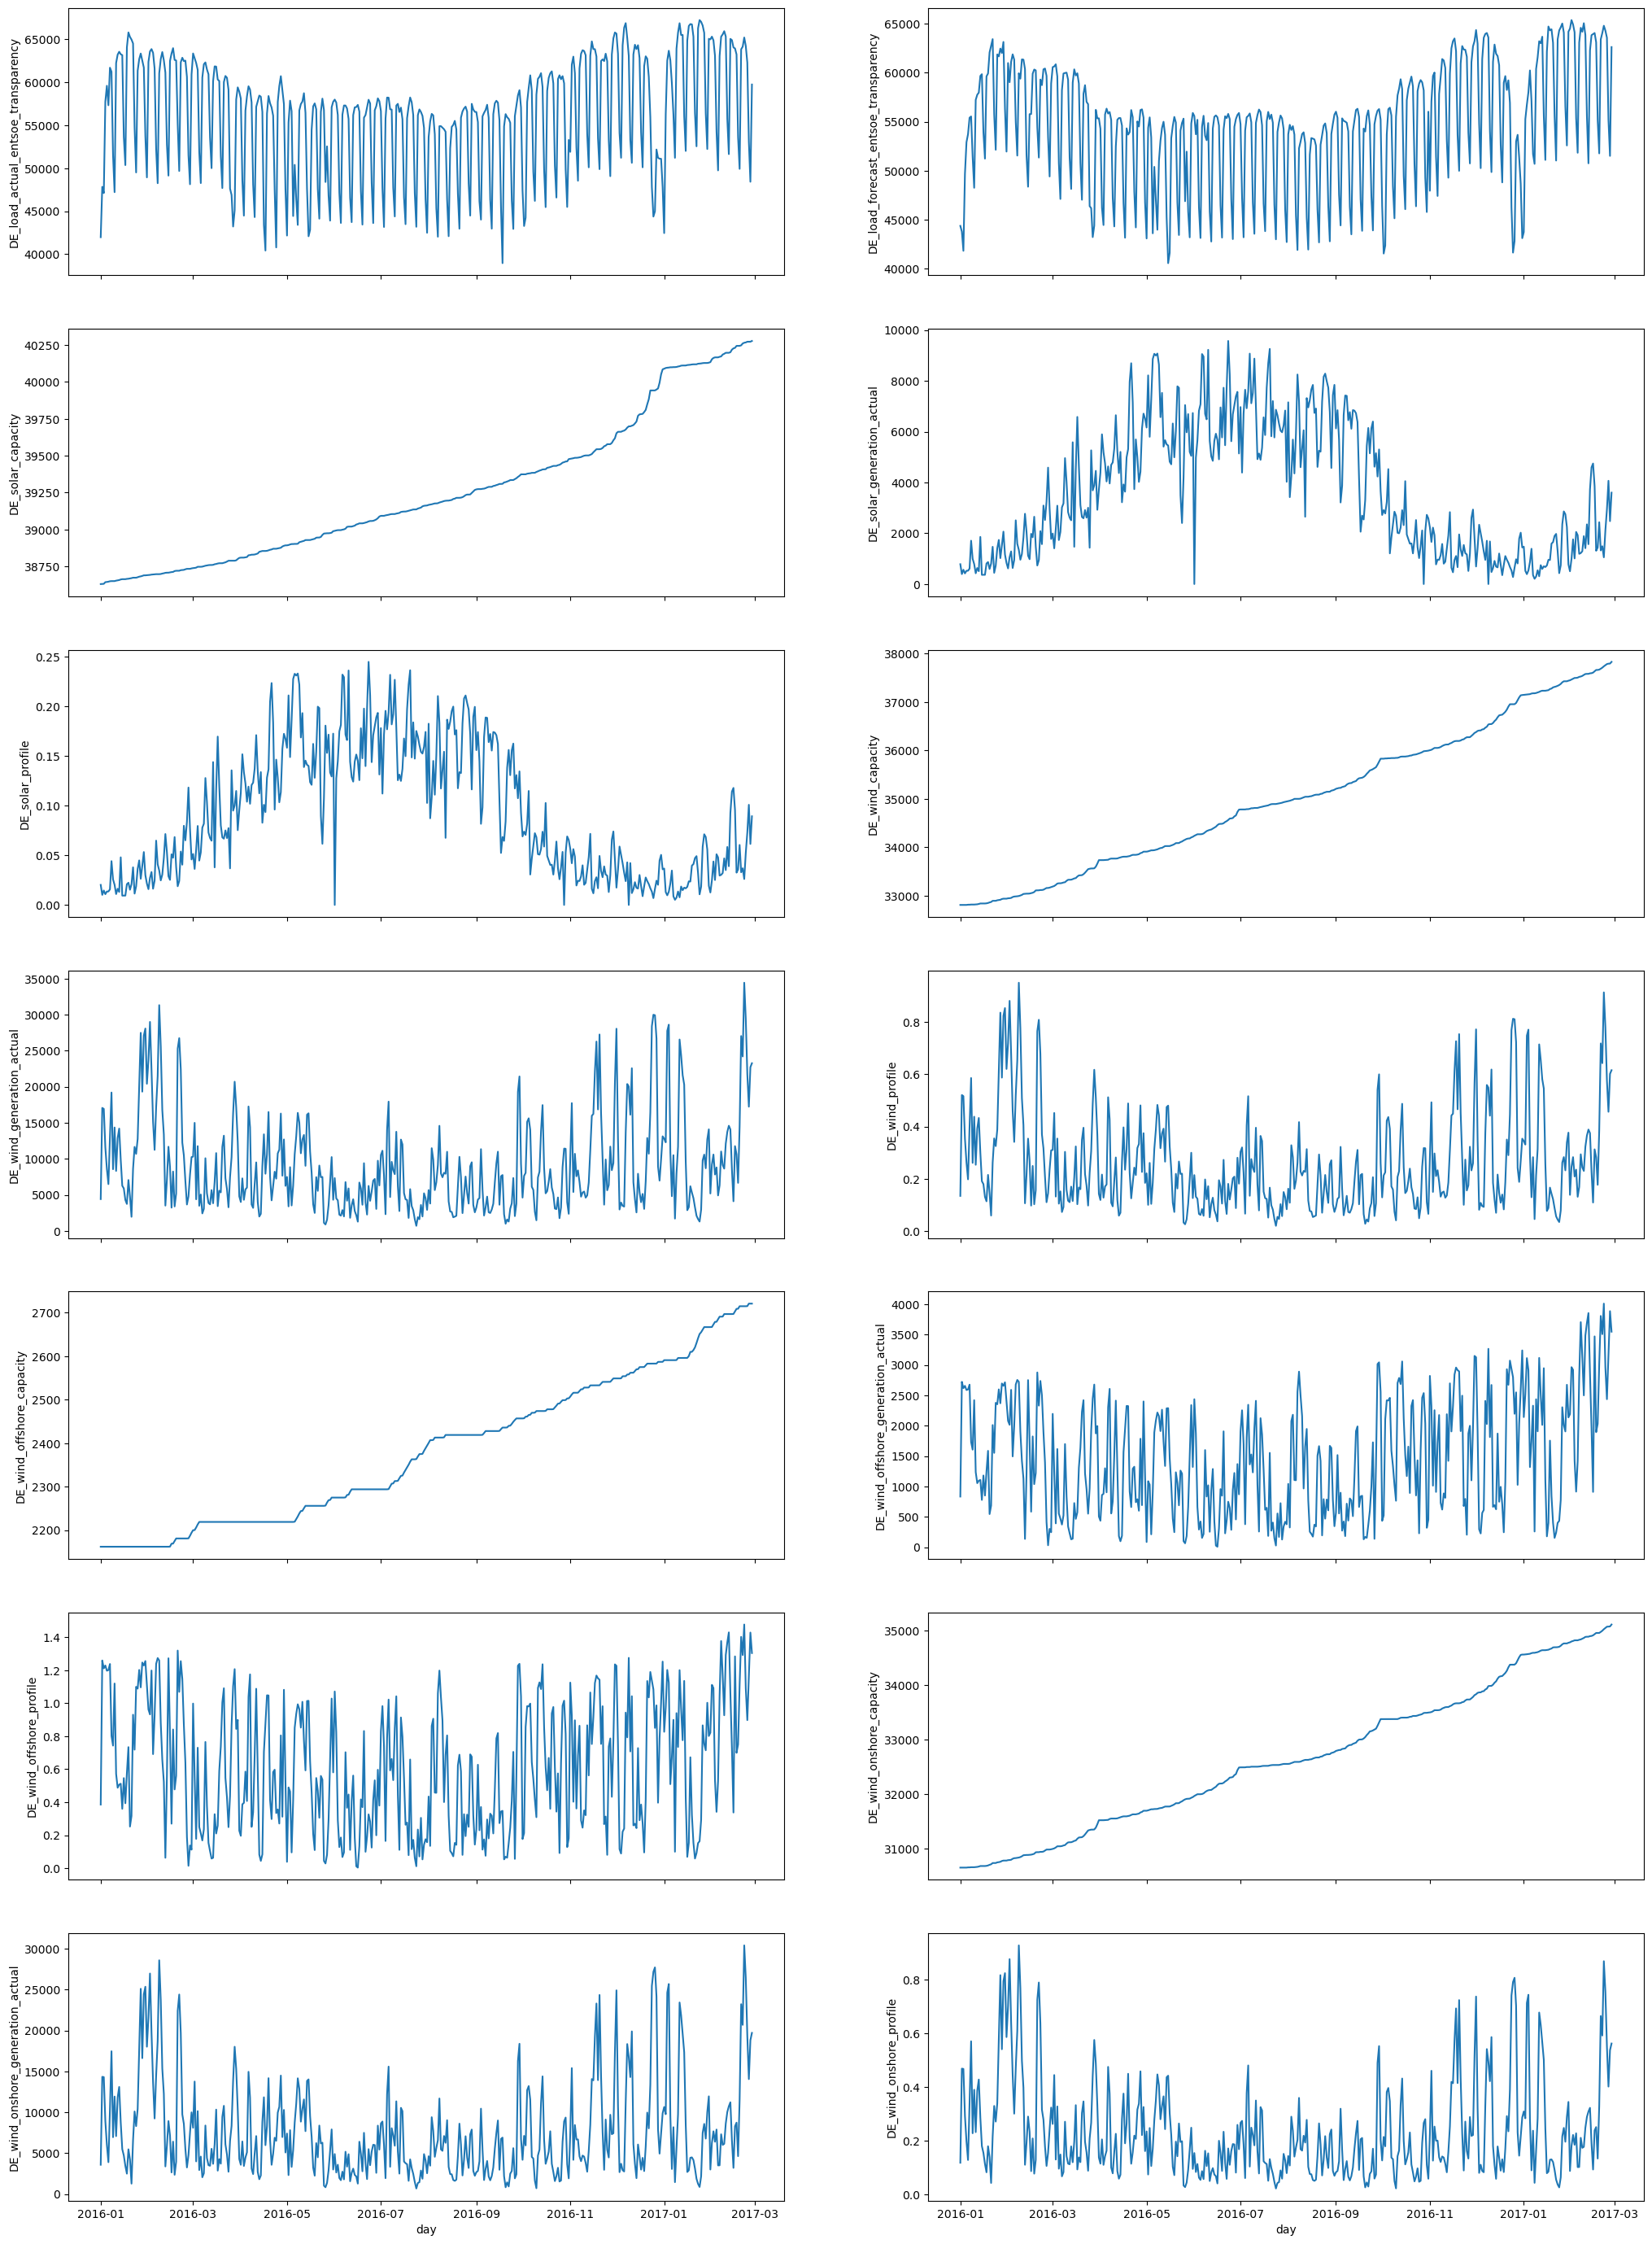

In [141]:
metric_names = [c for c in daily_t.columns if c != 'day']

fig, ax = plt.subplots(7,2, figsize=(25, 35), sharex=True)
for c, subplot in zip(metric_names[:], ax.flatten()):
    sns.lineplot(data=daily_t, x='day', y=c, ax=subplot);

In [102]:
# sns.lineplot(data=daily_t, x='day', y='DE_amprion_load_actual_entsoe_transparency');

In [153]:
def plot_line(df, metrics, include):
    metrics = [c for c in metrics if include in c]
    date = df["day"]
    cm = plt.get_cmap('gist_rainbow')
    if len(metrics) == 0:
        return
    fig, ax = plt.subplots(figsize=(20, 10))
    color_map = [cm(1.*i/len(metrics)) for i in range(len(metrics))]
    for i,c in enumerate(metrics):
        value = df[c]
        ax.plot(date, value, color = color_map[i], label = c)
    #ax.set_title("{} summary".format(df.name), fontsize = 15)
    ax.set_xlabel("timestamp", fontsize = 10)
    ax.set_ylabel("kWh", fontsize = 10)
    ax.legend(loc="upper left")
    plt.show()
    

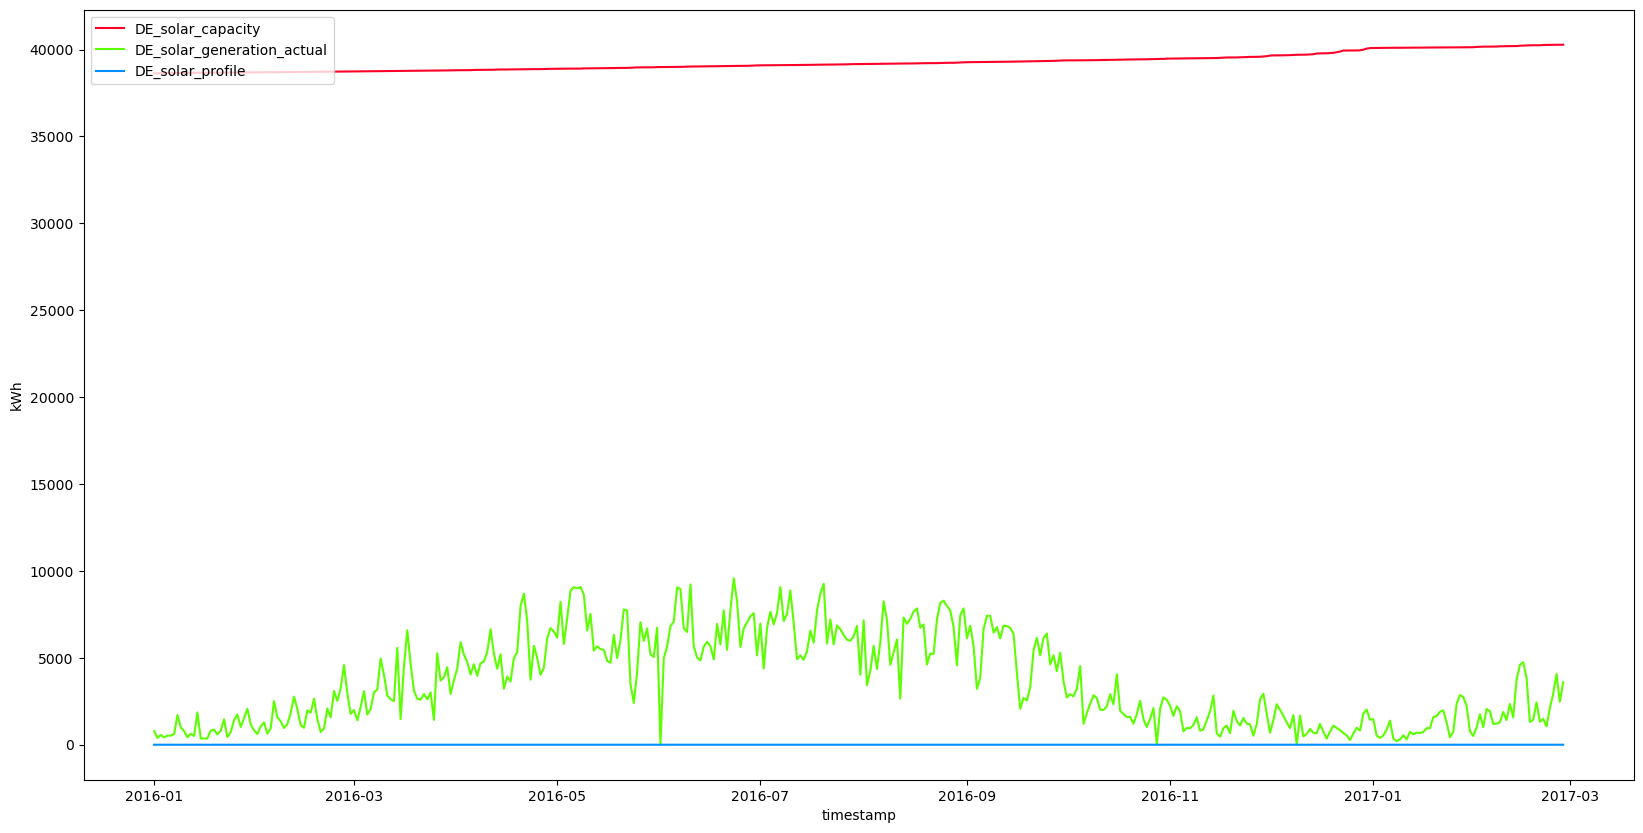

In [154]:
plot_line(daily_t, metric_names, 'solar', )

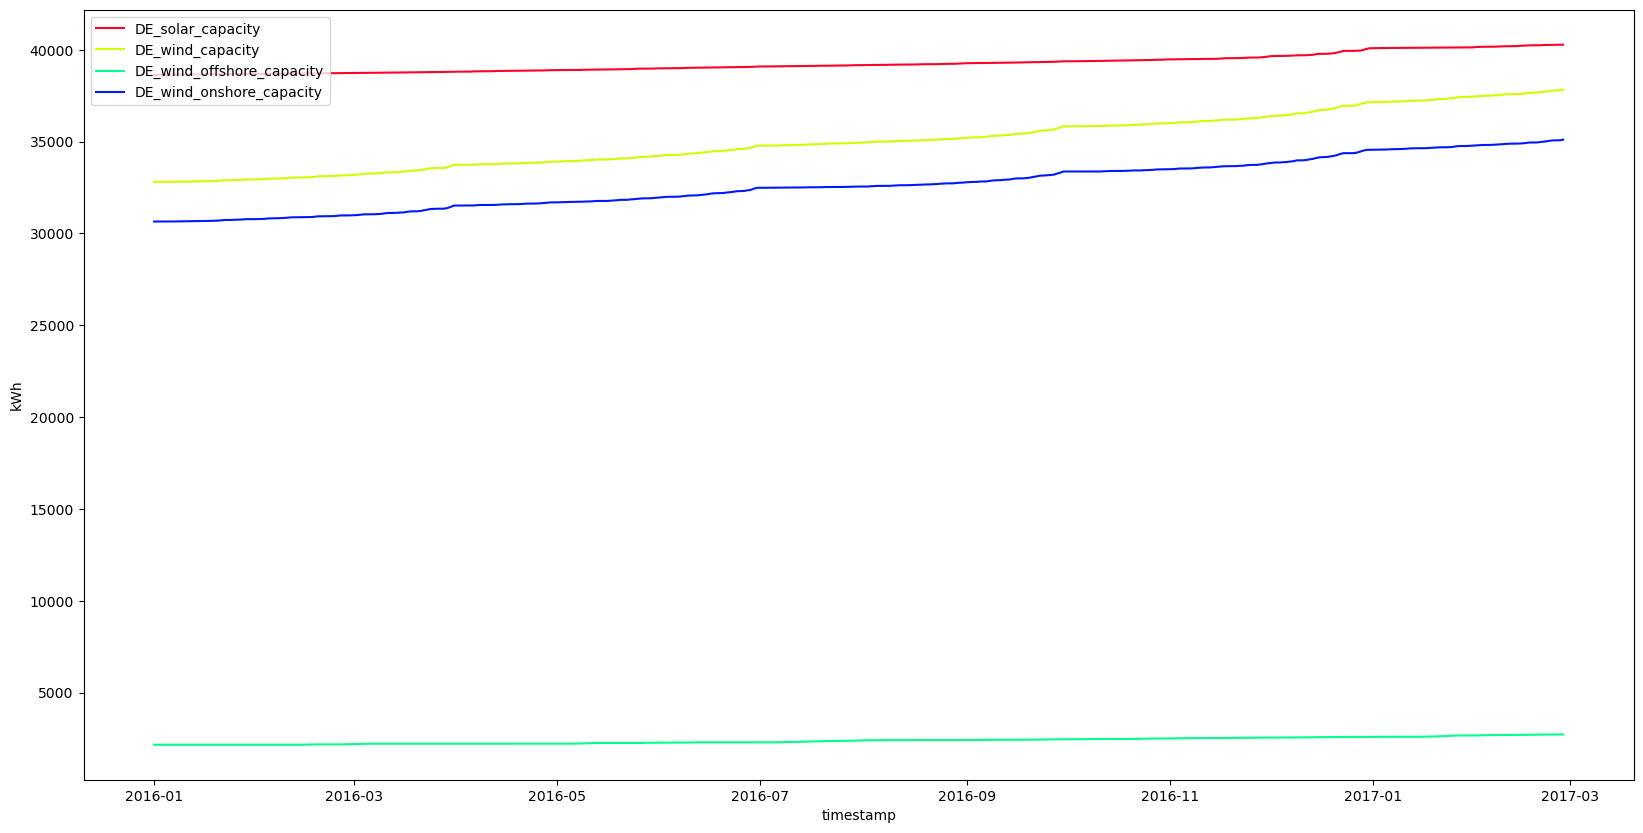

In [155]:
plot_line(daily_t, metric_names, 'capacity')

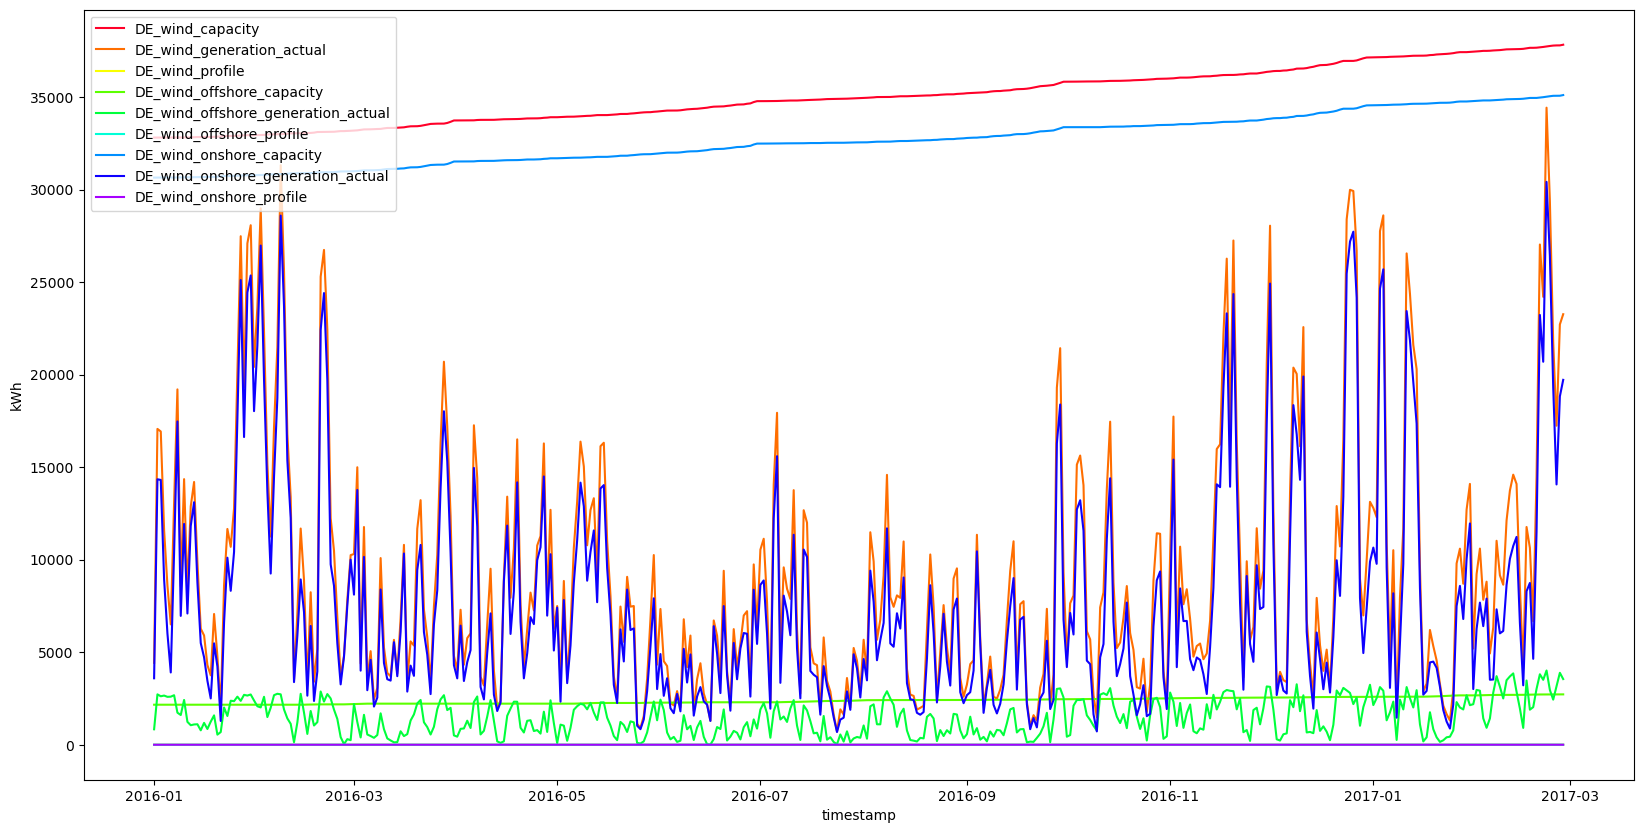

In [156]:
plot_line(daily_t, metric_names, 'wind')

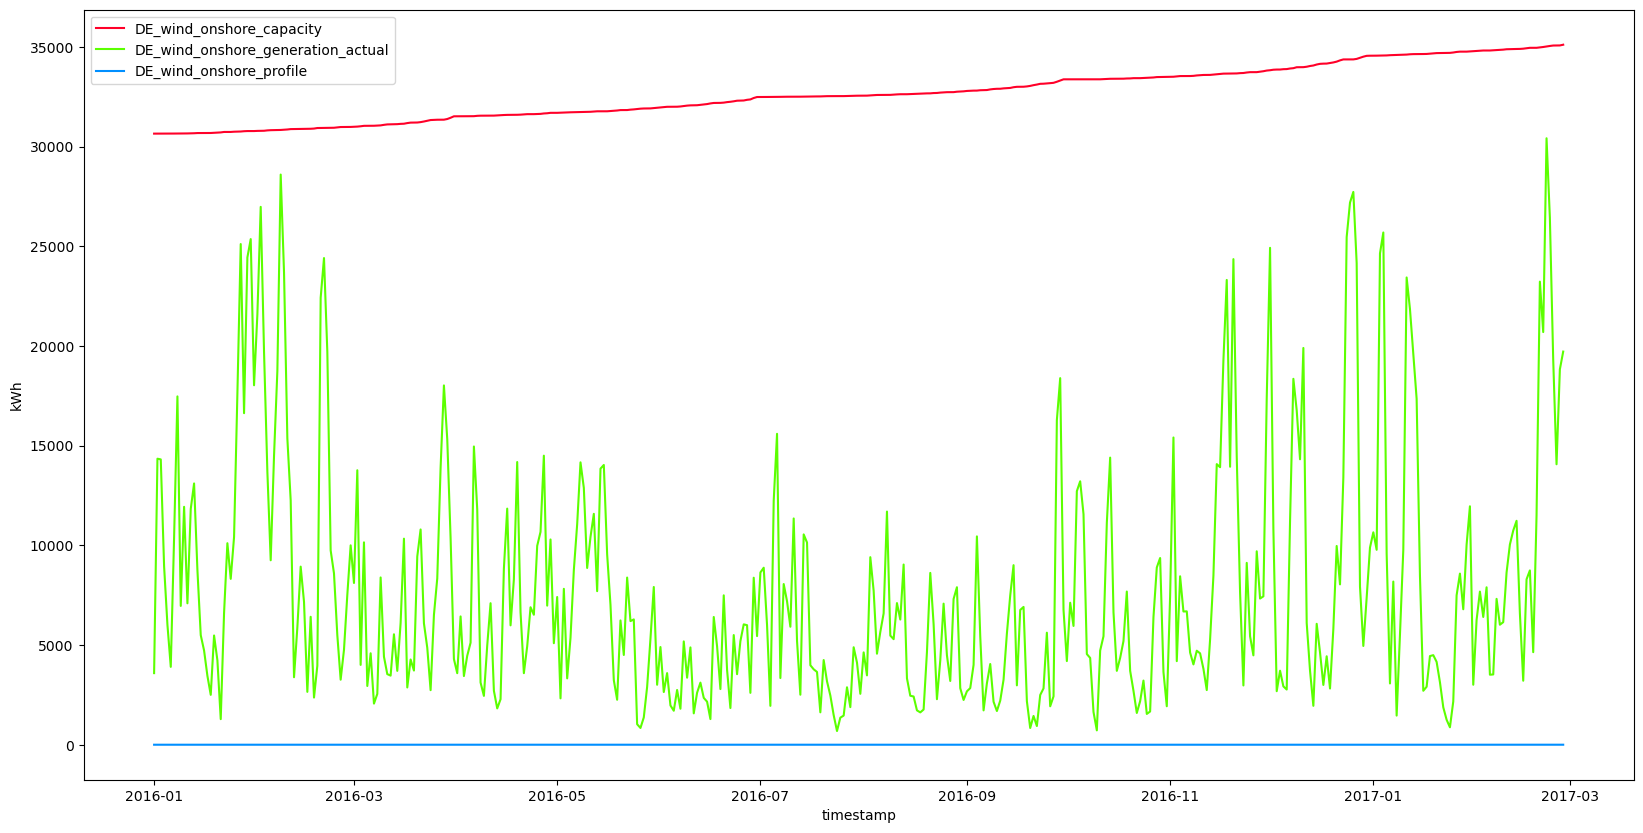

In [157]:
plot_line(daily_t, metric_names, 'wind_onshore')